# USING ``controlSBML``

## Preliminaries

In [ ]:
try:
    import controlSBML as ctl
except:
    !pip install controlSBML
    import controlSBML as ctl
import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ControlSBML Objects

## Construction ``ControlSBML``

In [ ]:
# From a URL
CTLSB_MTOR = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       input_names=["v1", "v11"], output_names=["mTORC1_DEPTOR", "mTORC2_DEPTOR"])

In [ ]:
SIMPLE_MODEL = """
J1: S1 -> S2; S1
S1 = 10; S2 = 0;
"""

In [ ]:
# From an antimony string
CTLSB_SIMPLE = ctl.ControlSBML(SIMPLE_MODEL, input_names=["J1"], output_names=["S2"])

## Properties

In [ ]:
# Print the first few lines of the antimony representation of this model
print(CTLSB_MTOR.antimony)

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end

HMM_Mod is "HMM_Mod"

function Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)
  k11ca*pmTORC1*DEPTOR/(Km11a + pDEPTOR) + k11cb*pmTORC2*DEPTOR/(Km11b + DEPTOR);
end

Function_for_v11 is "Function_for_v11"

function Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b)
  k5ca*pIRS*Akt/(Km5a + Akt) + k5cb*pmTORC2*Akt/(Km5b + Akt);
end

Function_for_v5 is "Function_for_v5"


model *Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR()

  // Compartments and Species:
  compartment compartment_;
  species IR in c

In [ ]:
CTLSB_MTOR.state_names

['IR',
 'pIR',
 'IRS',
 'pIRS',
 'iIRS',
 'Akt',
 'pAkt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'imTORC2',
 'mTORC1_DEPTOR',
 'mTORC2_DEPTOR',
 'DEPTOR',
 'pDEPTOR']

In [ ]:
CTLSB_MTOR.jacobian_df

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR
IR,-0.004518,0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIR,0.004518,-0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
IRS,0.000000,-0.066667,0.0,0.020000,0.02,0.0,0.000000,0.00,-0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIRS,0.000000,0.066667,0.0,-0.020000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
iIRS,0.000000,0.000000,0.0,0.000000,-0.02,0.0,0.000000,0.00,0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
Akt,0.000000,0.000000,0.0,-0.046729,0.00,0.0,0.058824,0.00,0.000000,0.00,-1.442308,0.0,0.000,0.000,0.00,0.000000
pAkt,0.000000,0.000000,0.0,0.046729,0.00,0.0,-0.058824,0.00,0.000000,0.00,1.442308,0.0,0.000,0.000,0.00,0.000000
mTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,-0.099206,-0.35,5.999848,0.00,0.000000,0.0,0.006,0.000,-0.25,0.000000
pmTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.099206,0.00,-5.999848,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
mTORC2,0.000000,-0.166667,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,-2.45,0.428571,0.0,0.000,0.006,-1.40,0.000000


In [ ]:
# State vector at current time
CTLSB_MTOR.state_ser

IR                50.0
pIR                0.0
IRS              100.0
pIRS               0.0
iIRS               0.0
Akt              100.0
pAkt               0.0
mTORC1           250.0
pmTORC1            0.0
mTORC2           200.0
pmTORC2            0.0
imTORC2            0.0
mTORC1_DEPTOR      0.0
mTORC2_DEPTOR      0.0
DEPTOR           350.0
pDEPTOR            0.0
dtype: float64

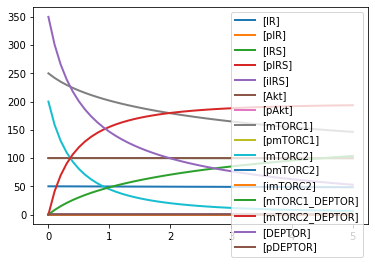

In [ ]:
# Run a roadrunner simulation
data = CTLSB_MTOR.roadrunner.simulate()
CTLSB_MTOR.roadrunner.plot(data)

In [ ]:
data["[mTORC1_DEPTOR]"]

array([  0.        ,   7.97532933,  14.71919234,  20.56435101,
        25.72431853,  30.34421942,  34.5271093 ,  38.34882709,
        41.86679949,  45.12555884,  48.16036123,  50.99958259,
        53.6664095 ,  56.18004694,  58.5565766 ,  60.80960868,
        62.9507778 ,  64.99010037,  66.93625713,  68.79683659,
        70.5785132 ,  72.28718335,  73.92808406,  75.50589417,
        77.02481548,  78.48863252,  79.90076566,  81.26431401,
        82.58209794,  83.85669513,  85.09047047,  86.28559611,
        87.44406995,  88.56773538,  89.65829864,  90.71734332,
        91.74634223,  92.74666525,  93.71958884,  94.66630613,
        95.58793483,  96.48552329,  97.36005591,  98.21245693,
        99.04359636,  99.85429526, 100.64532924, 101.41743117,
       102.17129425, 102.90757476, 103.62689509])

## Methods

In [ ]:
# Change the simulation time
CTLSB_MTOR.setTime(2)
CTLSB_MTOR.state_ser

IR                49.332441
pIR                0.667559
IRS               99.955594
pIRS               0.044387
iIRS               0.000019
Akt               99.962699
pAkt               0.037301
mTORC1           179.420968
pmTORC1            0.000516
mTORC2            20.129355
pmTORC2            0.027063
imTORC2            0.000000
mTORC1_DEPTOR     70.578516
mTORC2_DEPTOR    179.843582
DEPTOR            99.575651
pDEPTOR            0.002250
dtype: float64

A state space representation has the form:
* $\dot{{\bf x}} = {\bf A} {\bf x} + {\bf B} {\bf u}$
* ${\bf y} = {\bf C} {\bf x}$

Below is described the elements of this representation for SBML models. 
This is displayed as 4 sub-matrics: ${\bf A}$ is upper left, ${\bf B}$ is upper right, ${\bf C}$ is lower left, and ${\bf D}$ is lower right.

In [ ]:
# Create a state space model using the Jacobian at the current time
state_space = CTLSB_SIMPLE.makeStateSpace()
state_space

StateSpace(array([[-1.,  0.],
       [ 1.,  0.]]), array([[-1.],
       [ 1.]]), array([[0., 1.]]), array([[0.]]))

In [ ]:
# Create a NonlinearIOSystem object that can be used in creating InterconnectedSystems
# An effector_dct maps the input (a reaction flux) to a chemical species that can be manipulated
effector_dct = {"v1": "IR", "v11": "DEPTOR"}
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor", effector_dct=effector_dct)

# Other Objects and Functions

In [ ]:
## Simulating a system
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor")
# Simulate the system using as it is specified in the simulation. Note the warning messages.
ts = ctl.simulateSystem(non_linear_mtor)

***Warning***

   System mtor: Input v1 cannot be set. Ignored.
***Warning***

   System mtor: Input v11 cannot be set. Ignored.


In [ ]:
# The output is a Timeseries. This is a dataframe where the index is time in milliseconds
ts.head()

,mTORC1_DEPTOR,mTORC2_DEPTOR
miliseconds,,
0,0.000000,0.000000
100,7.976238,40.630475
200,14.719418,69.200285
300,20.563877,90.242212
400,25.726158,106.399542


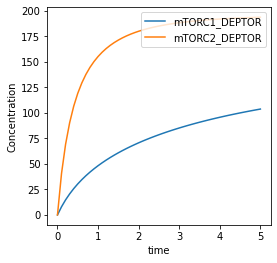

In [ ]:
# We can plot any Timeseries object. Various options are available for the plot
ctl.plotOneTS(ts, ylabel="Concentration", figsize=(4,4))

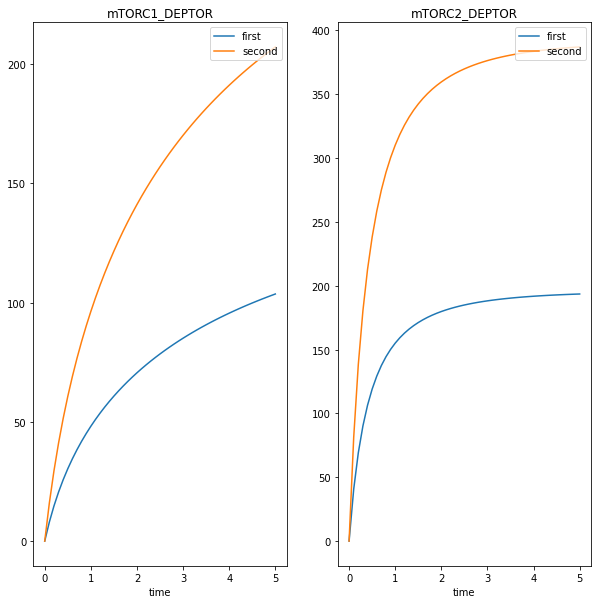

In [ ]:
# We can also plot multiple Time Series
df = ts.copy()  # Create a DataFrame from the Timeseries
for col in df.columns:
    df[col] = 2*ts[col]  # Create new values in the DataFrame
ts2 = ctl.Timeseries(df)  # Make a Timeseries from the DataFrame
ctl.plotManyTS(ts, ts2, ncol=2, names=["first", "second"])

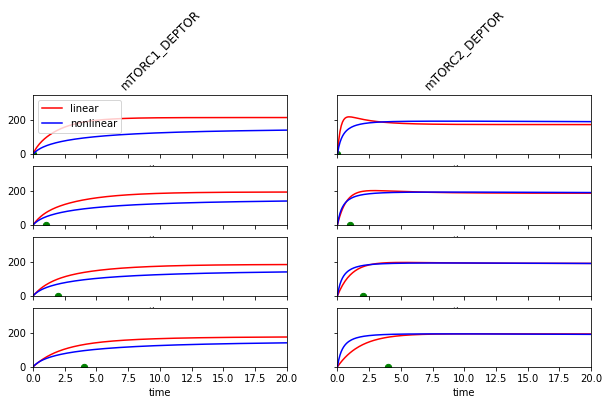

In [ ]:
# Compare the linear approximation using the Jacobian at different times with the true model
# The dot on the x-axis shows the timepoint of the Jacobian
CTLSB_MTOR.plotAccuracy(step_val=0, timepoints=[0, 1, 2, 4], figsize=(10, 5), xlabel="time", end_time=20)

# Constructing Feedback Systems

## mTOR System

<img src="images/mTOR-network.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

We use the CalTech ``control`` package to analyze and design control systems.
This is why ``ControlSBML`` has a method to create a ``StateSpace`` object (``makeStateSpace``) and
a ``NonlinearIOSystem`` object (``makeNonlinearIOSystem``).
Below, we show how to construct a PI controller.
To avoid excessive "windup", we hae a threshold on the control error.

In the following, the control objective is to regulate mTORC1_DEPTOR.
This is done b controlling phosphorylated Akt (pAkt),
which has an *inverse* effect on mTORC1_DEPTOR.

The implementation has 3 parts:

* The mTOR system. See ``mtor`` below. This has the input ``v6`` that controls the conversion of pAkt to Akt
and the outputs TORC1_DEPTOR, pAkt.
* The controller, ``controller``. This is a proportional controller that calculates the difference between
the reference value of TORC1_DEPTOR in ``xeq`` and the measured value that is output from ``mtor``.
* The closed loop system, ``closed``, that describes the connections between the mTOR system and the controller.

In [ ]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       input_names=["v6"], output_names=["mTORC1_DEPTOR", "pAkt"])
effector_dct = {"v6": "pAkt"}
mtor = ctlsb.makeNonlinearIOSystem("mtor", effector_dct=effector_dct)

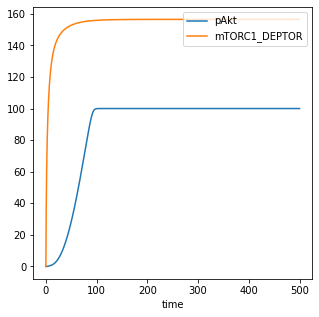

In [ ]:
# Uncontrolled system
ctl.plotOneTS(ctl.simulateSystem(mtor, end_time=500), figsize=(5,5))

In [ ]:
# State at which system will be regulated
ctlsb.setTime(4.5)
mtor_initial_state = ctlsb.state_ser.values
ctlsb.state_ser

IR                48.555905
pIR                1.444095
IRS               99.784581
pIRS               0.215162
iIRS               0.000258
Akt               99.835887
pAkt               0.164113
mTORC1           150.143156
pmTORC1            0.002549
mTORC2             7.143008
pmTORC2            0.039623
imTORC2            0.000000
mTORC1_DEPTOR     99.854295
mTORC2_DEPTOR    192.817369
DEPTOR            57.322228
pDEPTOR            0.006108
dtype: float64

## Controller

In [ ]:
xeq = [100]  # Desired concentration for mTORC1_DEPTOR
def outfcn(t, x, u, _):
    # State is accumulated error
    new_err = xeq[0] - u[0]
    return -30*new_err
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

## InterconnectSystem

In [ ]:
# Create the closed loop system
closed_outputs = list(mtor.outlist)
closed_outputs.append('controller.out')
#closed_outputs.append("controller.out")  # Make this visible as well
mtor_closed = control.interconnect(
  [mtor, controller],       # systems
  connections=[
    ['mtor.v6', 'controller.out'],
    ['controller.in',  'mtor.mTORC1_DEPTOR'],
  ],
  inplist=["controller.in"],
  outlist=closed_outputs,
)

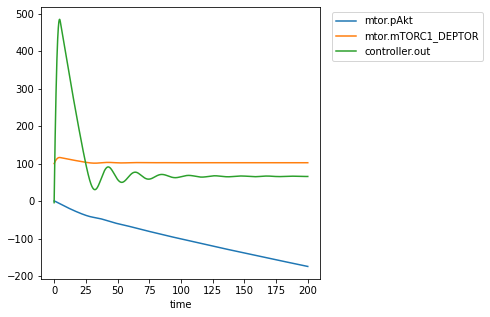

In [ ]:
initial_x_vec = list(mtor_initial_state)
ts = ctl.simulateSystem(mtor_closed, output_names=closed_outputs, initial_x_vec=initial_x_vec, end_time=200)
ctl.plotOneTS(ts, figsize=(5,5), legend_crd=(1.6, 1))

Recall that the uncontrolled system had mTORC1_DEPTOR equal to 150. The closed loop system regulates this to 100, as desired.

## Notes and Comments

Some considerations in control analysis:
* Choose appropriate inputs regulate in the system under control and appropriate effectors for those inputs.
* Make sure that you use the correct directional change for how the control error impacts the measured output.
If the closed loop system is unstable, you likely have used the wrong direction.
* If you use the state update function (``updfcn``), remember that the output is the derivative of the new state.